In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2

In [3]:
subway_delay = pd.read_csv('SubwayDelays.csv')

In [4]:
subway_delay.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2024-01-01,02:00,Monday,SHEPPARD STATION,MUI,0.0,0.0,N,YU,5491
1,2024-01-01,02:00,Monday,DUNDAS STATION,MUIS,0.0,0.0,N,YU,0
2,2024-01-01,02:08,Monday,DUNDAS STATION,MUPAA,4.0,10.0,N,YU,6051
3,2024-01-01,02:13,Monday,KENNEDY BD STATION,PUTDN,10.0,16.0,E,BD,5284
4,2024-01-01,02:22,Monday,BLOOR STATION,MUPAA,4.0,10.0,N,YU,5986


In [5]:
subway_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11212 entries, 0 to 11211
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11212 non-null  object 
 1   Time       11212 non-null  object 
 2   Day        11212 non-null  object 
 3   Station    11212 non-null  object 
 4   Code       11212 non-null  object 
 5   Min Delay  11212 non-null  float64
 6   Min Gap    11212 non-null  float64
 7   Bound      7347 non-null   object 
 8   Line       11201 non-null  object 
 9   Vehicle    11212 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 876.1+ KB


In [6]:
subway_delay.isnull().sum()

Date            0
Time            0
Day             0
Station         0
Code            0
Min Delay       0
Min Gap         0
Bound        3865
Line           11
Vehicle         0
dtype: int64

In [7]:
subway_delay['Bound'].unique()

array(['N', 'E', 'S', nan, 'W', 'B'], dtype=object)

In [8]:
subway_delay = subway_delay.dropna()

In [9]:
subway_delay.isnull().sum()

Date         0
Time         0
Day          0
Station      0
Code         0
Min Delay    0
Min Gap      0
Bound        0
Line         0
Vehicle      0
dtype: int64

In [10]:
subway_delay['Date'] = pd.to_datetime(subway_delay['Date'],format='%Y-%m-%d',errors='coerce')

In [11]:
subway_delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7346 entries, 0 to 11205
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7346 non-null   datetime64[ns]
 1   Time       7346 non-null   object        
 2   Day        7346 non-null   object        
 3   Station    7346 non-null   object        
 4   Code       7346 non-null   object        
 5   Min Delay  7346 non-null   float64       
 6   Min Gap    7346 non-null   float64       
 7   Bound      7346 non-null   object        
 8   Line       7346 non-null   object        
 9   Vehicle    7346 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 631.3+ KB


In [12]:
subway_delay.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2024-01-01,02:00,Monday,SHEPPARD STATION,MUI,0.0,0.0,N,YU,5491
1,2024-01-01,02:00,Monday,DUNDAS STATION,MUIS,0.0,0.0,N,YU,0
2,2024-01-01,02:08,Monday,DUNDAS STATION,MUPAA,4.0,10.0,N,YU,6051
3,2024-01-01,02:13,Monday,KENNEDY BD STATION,PUTDN,10.0,16.0,E,BD,5284
4,2024-01-01,02:22,Monday,BLOOR STATION,MUPAA,4.0,10.0,N,YU,5986


In [13]:
subway_delay['Time'] = pd.to_datetime(subway_delay['Time'], format='%H:%M').dt.time


In [14]:
subway_delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7346 entries, 0 to 11205
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7346 non-null   datetime64[ns]
 1   Time       7346 non-null   object        
 2   Day        7346 non-null   object        
 3   Station    7346 non-null   object        
 4   Code       7346 non-null   object        
 5   Min Delay  7346 non-null   float64       
 6   Min Gap    7346 non-null   float64       
 7   Bound      7346 non-null   object        
 8   Line       7346 non-null   object        
 9   Vehicle    7346 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 631.3+ KB


In [15]:
subway_delay.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2024-01-01,02:00:00,Monday,SHEPPARD STATION,MUI,0.0,0.0,N,YU,5491
1,2024-01-01,02:00:00,Monday,DUNDAS STATION,MUIS,0.0,0.0,N,YU,0
2,2024-01-01,02:08:00,Monday,DUNDAS STATION,MUPAA,4.0,10.0,N,YU,6051
3,2024-01-01,02:13:00,Monday,KENNEDY BD STATION,PUTDN,10.0,16.0,E,BD,5284
4,2024-01-01,02:22:00,Monday,BLOOR STATION,MUPAA,4.0,10.0,N,YU,5986


In [16]:
subway_delay = subway_delay[subway_delay['Vehicle'] != 0]

In [17]:
subway_delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6536 entries, 0 to 11205
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6536 non-null   datetime64[ns]
 1   Time       6536 non-null   object        
 2   Day        6536 non-null   object        
 3   Station    6536 non-null   object        
 4   Code       6536 non-null   object        
 5   Min Delay  6536 non-null   float64       
 6   Min Gap    6536 non-null   float64       
 7   Bound      6536 non-null   object        
 8   Line       6536 non-null   object        
 9   Vehicle    6536 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 561.7+ KB


In [18]:
subway_delay.to_csv('SubwayDelay_Filtered.csv', index=False)


In [20]:
bus_delay = pd.read_csv('Bus_Delay.csv')

In [21]:
bus_delay.head()

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2024-01-01,89,02:08,Monday,KEELE AND GLENLAKE,Vision,10,20,N,7107
1,2024-01-01,39,02:30,Monday,FINCH STATION,General Delay,20,40,NaN,8914
2,2024-01-01,300,03:13,Monday,BLOOR AND MANNING,General Delay,0,0,NaN,8562
3,2024-01-01,65,03:23,Monday,PARLIAMENT AND BLOOR,Security,0,0,N,8574
4,2024-01-01,113,03:37,Monday,MAIN STATION,Security,0,0,NaN,8541


In [22]:
bus_delay.isnull().sum()

Date            0
Route         216
Time            0
Day             0
Location        0
Incident        0
Min Delay       0
Min Gap         0
Direction    3700
Vehicle         0
dtype: int64

In [23]:
bus_delay = bus_delay.dropna()

In [24]:
bus_delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20482 entries, 0 to 24237
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       20482 non-null  object
 1   Route      20482 non-null  object
 2   Time       20482 non-null  object
 3   Day        20482 non-null  object
 4   Location   20482 non-null  object
 5   Incident   20482 non-null  object
 6   Min Delay  20482 non-null  int64 
 7   Min Gap    20482 non-null  int64 
 8   Direction  20482 non-null  object
 9   Vehicle    20482 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.7+ MB


In [25]:
bus_delay['Date'] = pd.to_datetime(bus_delay['Date'],format='%Y-%m-%d',errors='coerce')

In [26]:
bus_delay.head()

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2024-01-01,89,02:08,Monday,KEELE AND GLENLAKE,Vision,10,20,N,7107
3,2024-01-01,65,03:23,Monday,PARLIAMENT AND BLOOR,Security,0,0,N,8574
5,2024-01-01,320,03:40,Monday,YONGE AND QUEENSQUAY,Operations - Operator,8,16,N,8192
6,2024-01-01,171,04:00,Monday,MOUNT DENNIS GARAGE,General Delay,20,20,S,1402
7,2024-01-01,12,04:02,Monday,VICTORIA PARK AND DANF,Emergency Services,21,42,N,8616


In [27]:
bus_delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20482 entries, 0 to 24237
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       20482 non-null  datetime64[ns]
 1   Route      20482 non-null  object        
 2   Time       20482 non-null  object        
 3   Day        20482 non-null  object        
 4   Location   20482 non-null  object        
 5   Incident   20482 non-null  object        
 6   Min Delay  20482 non-null  int64         
 7   Min Gap    20482 non-null  int64         
 8   Direction  20482 non-null  object        
 9   Vehicle    20482 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 1.7+ MB


In [28]:
bus_delay['Time'] = pd.to_datetime(bus_delay['Time'], format='%H:%M').dt.time

In [29]:
bus_delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20482 entries, 0 to 24237
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       20482 non-null  datetime64[ns]
 1   Route      20482 non-null  object        
 2   Time       20482 non-null  object        
 3   Day        20482 non-null  object        
 4   Location   20482 non-null  object        
 5   Incident   20482 non-null  object        
 6   Min Delay  20482 non-null  int64         
 7   Min Gap    20482 non-null  int64         
 8   Direction  20482 non-null  object        
 9   Vehicle    20482 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 1.7+ MB


In [30]:
bus_delay.to_csv('BusDelay_Filtered.csv', index=False)

In [31]:
import requests

# Toronto Open Data is stored in a CKAN instance. It's APIs are documented here:
# https://docs.ckan.org/en/latest/api/

# To hit our API, you'll be making requests to:
base_url = "https://ckan0.cf.opendata.inter.prod-toronto.ca"

# Datasets are called "packages". Each package can contain many "resources"
# To retrieve the metadata for this package and its resources, use the package name in this page's URL:
url = base_url + "/api/3/action/package_show"
params = { "id": "ttc-routes-and-schedules"}
package = requests.get(url, params = params).json()

# To get resource data:
for idx, resource in enumerate(package["result"]["resources"]):

       # To get metadata for non datastore_active resources:
       if not resource["datastore_active"]:
           url = base_url + "/api/3/action/resource_show?id=" + resource["id"]
           resource_metadata = requests.get(url).json()
           print(resource_metadata)
           # From here, you can use the "url" attribute to download this file


{'help': 'https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/help_show?name=resource_show', 'success': True, 'result': {'cache_last_updated': None, 'cache_url': None, 'created': '2020-12-07T21:50:41.530037', 'datastore_active': False, 'extract_job': 'Airflow: upload_remote_files', 'format': 'ZIP', 'hash': '', 'id': 'cfb6b2b8-6191-41e3-bda1-b175c51148cb', 'is_datastore_cache_file': False, 'is_preview': False, 'last_modified': '2024-07-30T12:25:43', 'metadata_modified': '2024-07-30T13:15:59.659169', 'mimetype': 'application/zip', 'mimetype_inner': None, 'name': 'TTC Routes and Schedules Data', 'package_id': '7795b45e-e65a-4465-81fc-c36b9dfff169', 'position': 0, 'resource_type': None, 'revision_id': '4e00475d-2c1b-421a-ae1c-7686ae77d08f', 'size': 34949461, 'state': 'active', 'url': 'https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/7795b45e-e65a-4465-81fc-c36b9dfff169/resource/cfb6b2b8-6191-41e3-bda1-b175c51148cb/download/opendata_ttc_schedules.zip', 'url_type': 'upload'}}

In [33]:
import zipfile
import os

# Define the path to the GTFS ZIP file and the directory to extract it to
gtfs_zip_path = '/Users/mihirdharaiya/Desktop/TTC-Delay/TTC Routes and Schedules Data.zip'
extracted_dir = '/Users/mihirdharaiya/Desktop/TTC Project/Routes and Schedules'

# Unzip the GTFS data
with zipfile.ZipFile(gtfs_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# List of GTFS files to read
gtfs_files = [
    'agency.txt',
    'stops.txt',
    'routes.txt',
    'trips.txt',
    'stop_times.txt',
    'calendar.txt',
    'calendar_dates.txt',
]

# Dictionary to hold the DataFrames
gtfs_data = {}

# Read each GTFS file into a DataFrame
for file in gtfs_files:
    file_path = os.path.join(extracted_dir, file)
    if os.path.exists(file_path):
        gtfs_data[file.replace('.txt', '')] = pd.read_csv(file_path)
    else:
        print(f"{file} not found in the extracted directory.")

# Access individual DataFrames, for example:
stops_df = gtfs_data['stops']
routes_df = gtfs_data['routes']

# Print the first few rows of each DataFrame
for key, df in gtfs_data.items():
    print(f"--- {key} ---")
    print(df.head())


--- agency ---
   agency_id agency_name         agency_url  agency_timezone agency_lang  \
0          1         TTC  http://www.ttc.ca  America/Toronto          en   

   agency_phone  agency_fare_url  
0  416-393-4636              NaN  
--- stops ---
   stop_id  stop_code                       stop_name  stop_desc   stop_lat  \
0      262        662       Danforth Rd at Kennedy Rd        NaN  43.714379   
1      263        929      Davenport Rd at Bedford Rd        NaN  43.674448   
2      264        940       Davenport Rd at Dupont St        NaN  43.675511   
3      265       1871  Davisville Ave at Cleveland St        NaN  43.702088   
4      266      11700          Disco Rd at Attwell Dr        NaN  43.701362   

    stop_lon  zone_id  stop_url  location_type  parent_station  stop_timezone  \
0 -79.260939      NaN       NaN            NaN             NaN            NaN   
1 -79.399659      NaN       NaN            NaN             NaN            NaN   
2 -79.401938      NaN       Na

In [34]:
stops_df

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,262,662,Danforth Rd at Kennedy Rd,NaN,43.714379,-79.260939,NaN,NaN,NaN,NaN,NaN,1
1,263,929,Davenport Rd at Bedford Rd,NaN,43.674448,-79.399659,NaN,NaN,NaN,NaN,NaN,1
2,264,940,Davenport Rd at Dupont St,NaN,43.675511,-79.401938,NaN,NaN,NaN,NaN,NaN,2
3,265,1871,Davisville Ave at Cleveland St,NaN,43.702088,-79.378112,NaN,NaN,NaN,NaN,NaN,1
4,266,11700,Disco Rd at Attwell Dr,NaN,43.701362,-79.594843,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9404,24818,16540,Bayview Ave at Broadway Ave,NaN,43.713761,-79.377455,NaN,NaN,NaN,NaN,NaN,1
9405,24819,16541,Cummer Ave at Becky Cheung Ct,NaN,43.789093,-79.408279,NaN,NaN,NaN,NaN,NaN,1
9406,24820,16542,Thorncliffe Park Dr at Pat Moore Dr,NaN,43.709482,-79.344724,NaN,NaN,NaN,NaN,NaN,1
9407,24821,16543,Spadina Ave at King St West North Side,NaN,43.645774,-79.395044,NaN,NaN,NaN,NaN,NaN,1


In [35]:
stops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9409 entries, 0 to 9408
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stop_id              9409 non-null   int64  
 1   stop_code            9409 non-null   int64  
 2   stop_name            9409 non-null   object 
 3   stop_desc            0 non-null      float64
 4   stop_lat             9409 non-null   float64
 5   stop_lon             9409 non-null   float64
 6   zone_id              0 non-null      float64
 7   stop_url             0 non-null      float64
 8   location_type        0 non-null      float64
 9   parent_station       0 non-null      float64
 10  stop_timezone        0 non-null      float64
 11  wheelchair_boarding  9409 non-null   int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 882.2+ KB


In [36]:
routes_df

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,72463,1,1,LINE 1 (YONGE-UNIVERSITY),NaN,1,NaN,D5C82B,000000
1,72244,1,10,VAN HORNE,NaN,3,NaN,FF0000,FFFFFF
2,72245,1,100,FLEMINGDON PARK,NaN,3,NaN,FF0000,FFFFFF
3,72246,1,101,DOWNSVIEW PARK,NaN,3,NaN,FF0000,FFFFFF
4,72247,1,102,MARKHAM RD.,NaN,3,NaN,FF0000,FFFFFF
...,...,...,...,...,...,...,...,...,...
211,72458,1,986,SCARBOROUGH EXPRESS,NaN,3,NaN,008000,FFFFFF
212,72459,1,989,WESTON EXPRESS,NaN,3,NaN,008000,FFFFFF
213,72460,1,99,ARROW ROAD,NaN,3,NaN,FF0000,FFFFFF
214,72461,1,995,YORK MILLS EXPRESS,NaN,3,NaN,008000,FFFFFF


In [37]:
trips_df = gtfs_data['trips']

In [38]:
trips_df

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,72244,1,47506618,EAST - 10 VAN HORNE towards VICTORIA PARK,NaN,0,2066380,1023642,1,1
1,72244,1,47506619,EAST - 10 VAN HORNE towards VICTORIA PARK,NaN,0,2066380,1023643,1,1
2,72244,1,47506625,EAST - 10 VAN HORNE towards VICTORIA PARK,NaN,0,2066380,1023643,1,1
3,72244,1,47506624,EAST - 10 VAN HORNE towards VICTORIA PARK,NaN,0,2066380,1023643,1,1
4,72244,1,47506623,EAST - 10 VAN HORNE towards VICTORIA PARK,NaN,0,2066380,1023643,1,1
...,...,...,...,...,...,...,...,...,...,...
128402,72465,4,47635753,LINE 4 (SHEPPARD) towards SHEPPARD-YONGE STATION,NaN,1,2072500,1026811,1,2
128403,72465,4,47635752,LINE 4 (SHEPPARD) towards SHEPPARD-YONGE STATION,NaN,1,2072499,1026811,1,2
128404,72465,4,47635751,LINE 4 (SHEPPARD) towards SHEPPARD-YONGE STATION,NaN,1,2072501,1026811,1,2
128405,72465,4,47635750,LINE 4 (SHEPPARD) towards SHEPPARD-YONGE STATION,NaN,1,2072500,1026811,1,2


In [39]:
calendar_df = gtfs_data['calendar']

In [40]:
calendar_df

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,1,1,1,1,1,1,0,0,20240728,20240831
1,2,0,0,0,0,0,1,0,20240728,20240831
2,3,0,0,0,0,0,0,1,20240728,20240831
3,4,0,0,0,0,0,0,0,20240728,20240831
4,501,0,0,0,0,0,0,0,20240728,20240831
5,4401,0,0,0,0,0,0,0,20240728,20240831
6,4501,0,0,0,0,0,0,0,20240728,20240831
7,2901,0,0,0,0,0,0,0,20240728,20240831
8,502,0,0,0,0,0,0,0,20240728,20240831


In [41]:
agency_df = gtfs_data['agency']

In [42]:
stop_times_df = gtfs_data['stop_times']
calendar_dates_df = gtfs_data['calendar_dates']

In [105]:
from sqlalchemy import create_engine

# Sample DataFrame
df = pd.DataFrame(calendar_dates_df)

# Replace with your actual PostgreSQL connection details
username = 'mihir'  # e.g., 'postgres'
password = 'Thug9010'  # e.g., 'mysecretpassword'
host = 'localhost'          # e.g., 'localhost' or '192.168.1.100'
port = '5432'          # e.g., '5432'
database = 'TTC_Project'  # e.g., 'mydatabase'

# Create the connection string
connection_string = f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}'

# Create the engine
engine = create_engine(connection_string)

# Define the table name where you want to store the DataFrame
# e.g., 'mytable'
table_name = 'calendar_dates'
# Store the DataFrame to PostgreSQL
df.to_sql(table_name, engine, if_exists='replace', index=False)

print(f"DataFrame stored in the table '{table_name}' in the PostgreSQL database.")


DataFrame stored in the table 'calendar_dates' in the PostgreSQL database.


In [37]:
# Establishing Connection with the database

connt = psycopg2.connect(
    database='TTC_Project',user='mihir',password='Thug9010', host='localhost',port='5432')

# Setting Auto Commit False 
connt.autocommit = True

cursor = connt.cursor()

# Retrieving Data
cursor.execute('''SELECT * FROM subway_delay''')
query = "SELECT * FROM subway_delay"
# Fetching First Row
result = cursor.fetchone();
print(result)


(datetime.datetime(2024, 1, 1, 0, 0), datetime.time(2, 0), 'Monday', 'SHEPPARD STATION', 'MUI', 0.0, 0.0, 'N', 'YU', 5491)


In [38]:
subway_delay_df = pd.read_sql_query(query, connt)


/Users/mihirdharaiya/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [39]:
subway_delay_df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2024-01-01,02:00:00,Monday,SHEPPARD STATION,MUI,0.0,0.0,N,YU,5491
1,2024-01-01,02:08:00,Monday,DUNDAS STATION,MUPAA,4.0,10.0,N,YU,6051
2,2024-01-01,02:13:00,Monday,KENNEDY BD STATION,PUTDN,10.0,16.0,E,BD,5284
3,2024-01-01,02:22:00,Monday,BLOOR STATION,MUPAA,4.0,10.0,N,YU,5986
4,2024-01-01,02:25:00,Monday,ST CLAIR STATION,MUPAA,3.0,9.0,N,YU,6051


In [40]:
subway_delay_df.describe()

,Min Delay,Min Gap,Vehicle
count,6536.000000,6536.000000,6536.000000
mean,4.873317,7.254437,5548.663862
std,15.666772,16.360335,423.348400
min,0.000000,0.000000,7.000000
25%,0.000000,0.000000,5235.000000
50%,3.000000,7.000000,5536.000000
75%,6.000000,10.000000,5872.250000
max,716.000000,719.000000,9546.000000


In [41]:
delays_per_station = subway_delay_df['Station'].value_counts()
delays_per_line = subway_delay_df['Line'].value_counts()
delays_per_day = subway_delay_df['Day'].value_counts()


In [42]:
print("Delays per Line")
delays_per_line

Delays per Line


YU     3728
BD     2541
SHP     265
YUS       2
Name: Line, dtype: int64

In [43]:
print("Delays per Day")
delays_per_day

Delays per Day


Tuesday      1062
Thursday     1039
Friday       1033
Wednesday    1001
Monday        920
Saturday      870
Sunday        611
Name: Day, dtype: int64

In [44]:
print("Delays per Station")
delays_per_station

Delays per Station


BLOOR STATION             298
EGLINTON STATION          209
KIPLING STATION           200
FINCH STATION             193
VAUGHAN MC STATION        178
                         ... 
CHRISTIE STATION (LEAV      1
YONGE STATION               1
LESLIE STATION (APPROA      1
UNION STATION (TOWARDS      1
YONGE BD STATION TO CO      1
Name: Station, Length: 135, dtype: int64

<AxesSubplot:xlabel='Min Delay'>

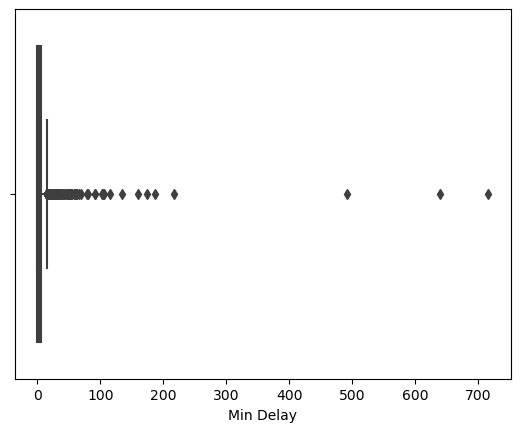

In [45]:
sns.boxplot(x=subway_delay_df["Min Delay"])

In [46]:
Q1 = subway_delay_df['Min Delay'].quantile(0.25)
Q3 = subway_delay_df['Min Delay'].quantile(0.75)
IQR = Q3 - Q1

In [47]:
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the bounds to check
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Lower bound: -9.0, Upper bound: 15.0


In [48]:
# Filter the data to remove outliers
subway_delay_df = subway_delay_df[
    (subway_delay_df['Min Delay'] >= lower_bound) & (subway_delay_df['Min Delay'] <= upper_bound)
]

# Print the shape of the original and filtered data to check
print(f"Original data shape: {subway_delay_df.shape}")


Original data shape: (6208, 10)


<AxesSubplot:xlabel='Min Delay'>

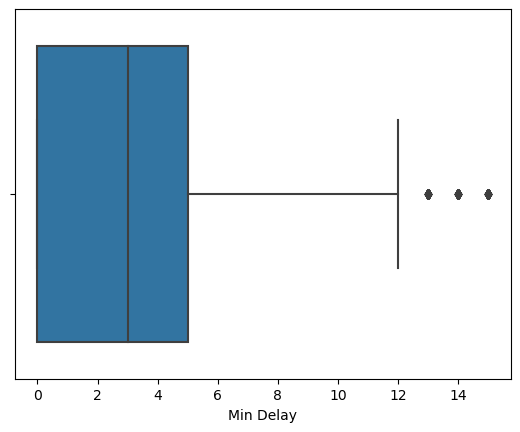

In [49]:
sns.boxplot(x=subway_delay_df["Min Delay"])

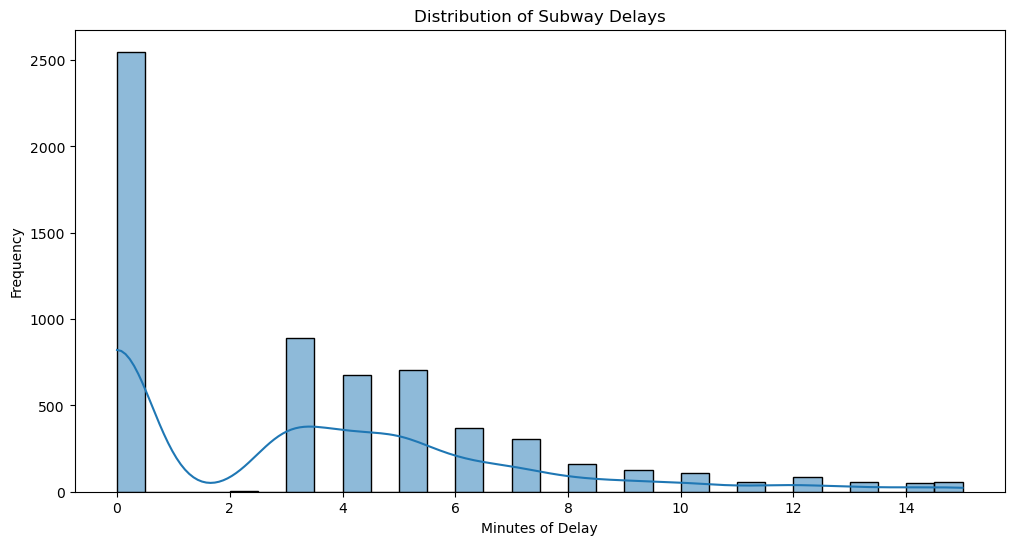

In [50]:
plt.figure(figsize=(12, 6))
sns.histplot(subway_delay_df['Min Delay'], kde=True, bins=30)
plt.title('Distribution of Subway Delays')
plt.xlabel('Minutes of Delay')
plt.ylabel('Frequency')
plt.show()

In [51]:
subway_delay_df['Time'] = pd.to_datetime(subway_delay_df['Time'], format='%H:%M:%S')
subway_delay_df['Hour'] = subway_delay_df['Time'].dt.hour

In [52]:
hourly_delays = subway_delay_df.groupby('Hour')['Min Delay'].mean().reset_index()
hourly_delays.columns = ['Hour', 'AvgDelay']

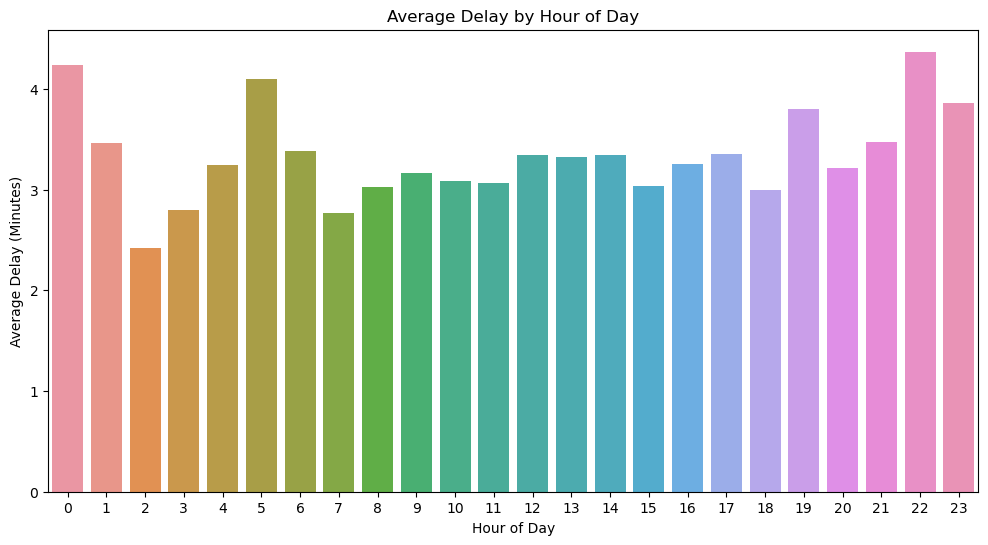

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_delays, x='Hour', y='AvgDelay')
plt.title('Average Delay by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (Minutes)')
plt.show()

In [54]:
delay_by_day = subway_delay_df.groupby('Day')['Min Delay'].mean().reset_index()

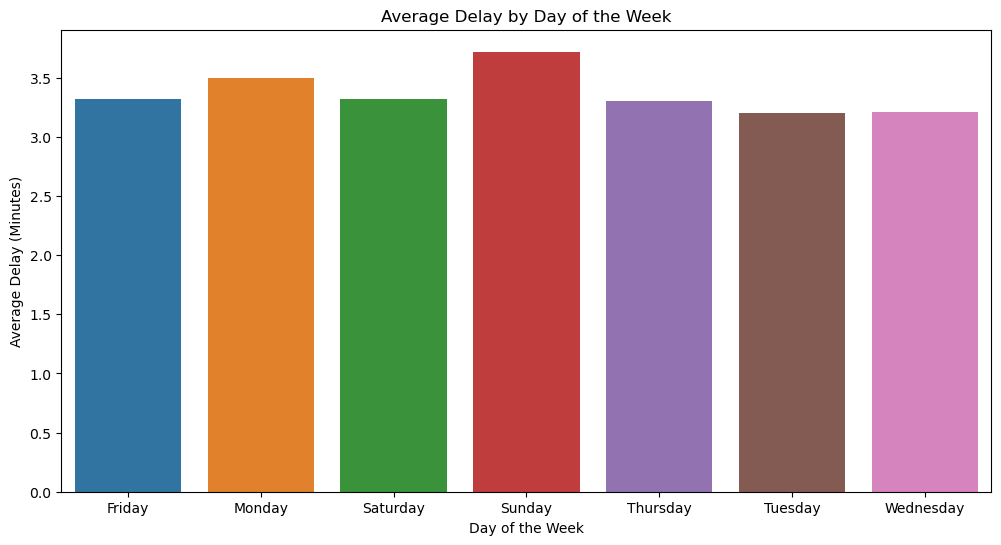

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(data=delay_by_day, x='Day', y='Min Delay')
plt.title('Average Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (Minutes)')
plt.show()

In [56]:
# Calculate the frequency and average delay for each station
station_delay_stats = subway_delay_df.groupby('Station').agg(
    Frequency=('Min Delay', 'count'),
    AvgDelay=('Min Delay', 'mean')
).reset_index()


In [57]:
# Sort by frequency of delays
top_stations_by_frequency = station_delay_stats.sort_values(by='Frequency', ascending=False).head(10)

# Sort by average delay time
top_stations_by_avg_delay = station_delay_stats.sort_values(by='AvgDelay', ascending=False).head(10)


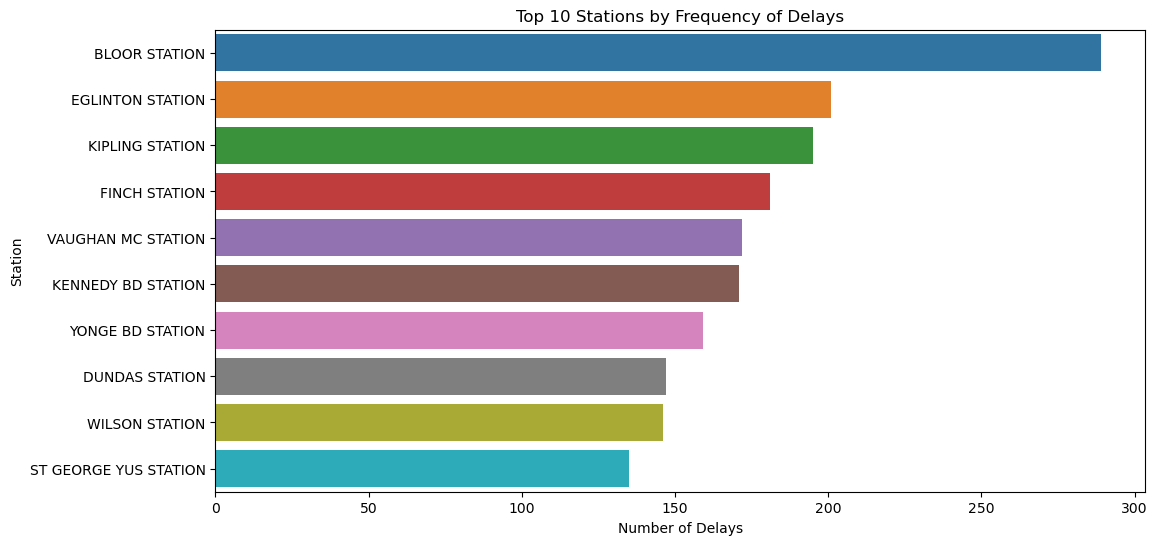

In [58]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_stations_by_frequency, x='Frequency', y='Station', orient='h')
plt.title('Top 10 Stations by Frequency of Delays')
plt.xlabel('Number of Delays')
plt.ylabel('Station')
plt.show()

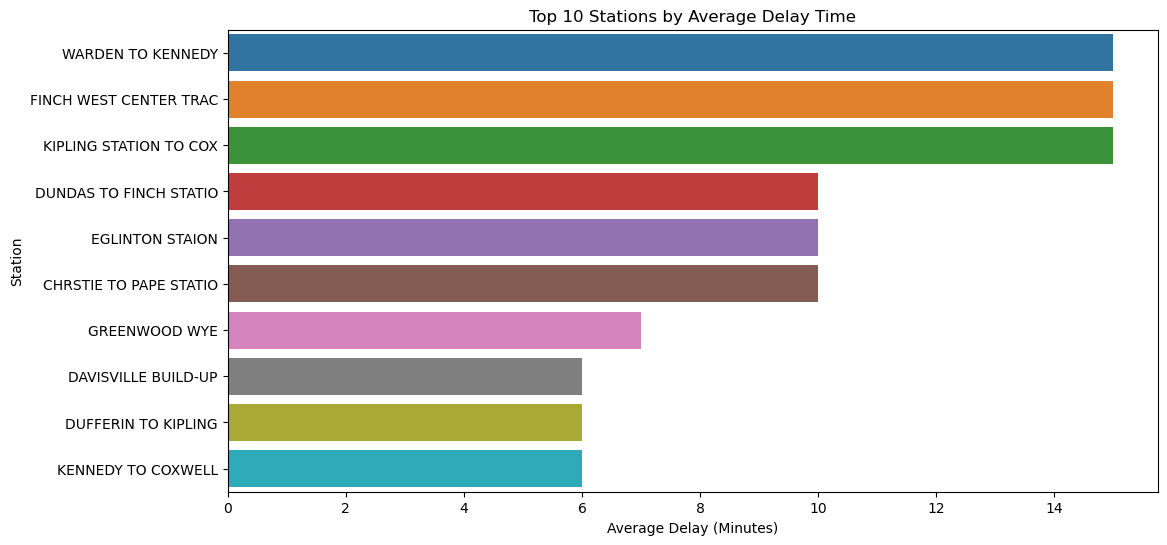

In [59]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_stations_by_avg_delay, x='AvgDelay', y='Station', orient='h')
plt.title('Top 10 Stations by Average Delay Time')
plt.xlabel('Average Delay (Minutes)')
plt.ylabel('Station')
plt.show()

In [60]:
delay_by_line = subway_delay_df.groupby('Line')['Min Delay'].mean().reset_index()

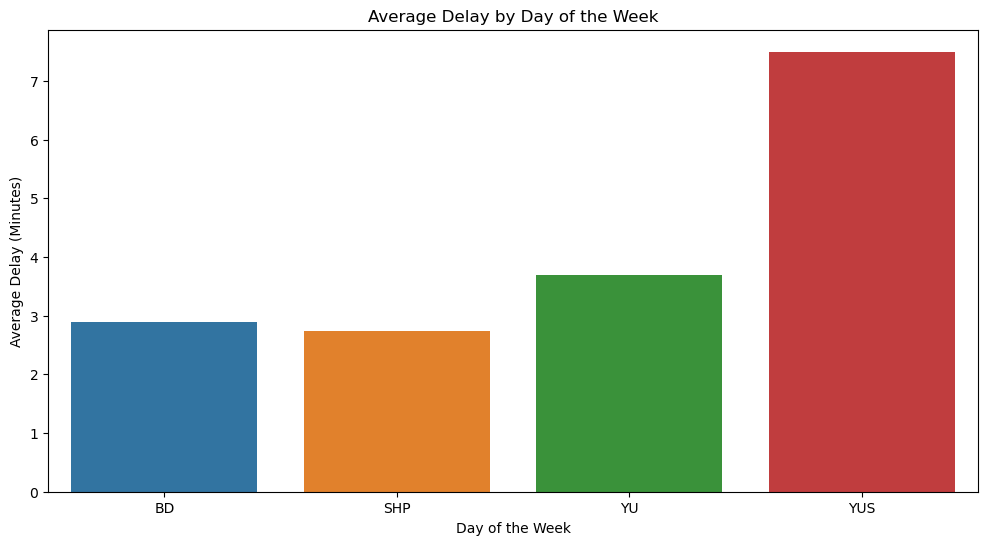

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(data=delay_by_line, x='Line', y='Min Delay')
plt.title('Average Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (Minutes)')
plt.show()

In [62]:
correlation_matrix = subway_delay_df.corr()
correlation_matrix

,Min Delay,Min Gap,Vehicle,Hour
Min Delay,1.000000,0.916771,0.078461,0.022573
Min Gap,0.916771,1.000000,0.097986,0.074780
Vehicle,0.078461,0.097986,1.000000,0.035254
Hour,0.022573,0.074780,0.035254,1.000000


In [63]:
subway_delay_df['Date'] = pd.to_datetime(subway_delay_df['Date'])
subway_delay_df['Hour'] = pd.to_datetime(subway_delay_df['Time']).dt.hour
subway_delay_df['DayOfWeek'] = subway_delay_df['Date'].dt.dayofweek
subway_delay_df['Month'] = subway_delay_df['Date'].dt.month

In [64]:
# Cumulative Features
subway_delay_df['Cumulative_Delay'] = subway_delay_df.groupby(['Station', 'Line'])['Min Delay'].cumsum()
subway_delay_df['Cumulative_Gap'] = subway_delay_df.groupby(['Station', 'Line'])['Min Gap'].cumsum()

# One-Hot Encoding
subway_delay_df = pd.get_dummies(subway_delay_df, columns=['Station', 'Code', 'Bound', 'Line'])

# Drop rows with NaN values created by lag features
subway_delay_df = subway_delay_df.dropna()

# Display the first few rows of the modified dataframe
subway_delay_df.head()

,Date,Time,Day,Min Delay,Min Gap,Vehicle,Hour,DayOfWeek,Month,Cumulative_Delay,...,Code_TUSUP,Code_XXXXX,Bound_E,Bound_N,Bound_S,Bound_W,Line_BD,Line_SHP,Line_YU,Line_YUS
0,2024-01-01,1900-01-01 02:00:00,Monday,0.0,0.0,5491,2,0,1,0.0,...,0,0,0,1,0,0,0,0,1,0
1,2024-01-01,1900-01-01 02:08:00,Monday,4.0,10.0,6051,2,0,1,4.0,...,0,0,0,1,0,0,0,0,1,0
2,2024-01-01,1900-01-01 02:13:00,Monday,10.0,16.0,5284,2,0,1,10.0,...,0,0,1,0,0,0,1,0,0,0
3,2024-01-01,1900-01-01 02:22:00,Monday,4.0,10.0,5986,2,0,1,4.0,...,0,0,0,1,0,0,0,0,1,0
4,2024-01-01,1900-01-01 02:25:00,Monday,3.0,9.0,6051,2,0,1,3.0,...,0,0,0,1,0,0,0,0,1,0


In [66]:
subway_delay_df.columns

Index(['Date', 'Time', 'Day', 'Min Delay', 'Min Gap', 'Vehicle', 'Hour',
       'DayOfWeek', 'Month', 'Cumulative_Delay',
       ...
       'Code_TUSUP', 'Code_XXXXX', 'Bound_E', 'Bound_N', 'Bound_S', 'Bound_W',
       'Line_BD', 'Line_SHP', 'Line_YU', 'Line_YUS'],
      dtype='object', length=256)

In [68]:
subway_delay_df['Minute'] = subway_delay_df['Time'].apply(lambda x: x.minute)
subway_delay_df['Second'] = subway_delay_df['Time'].apply(lambda x: x.second)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# Define features and target variable
X = subway_delay_df.drop(columns=['Date','Time','Min Delay','Day'])
y = subway_delay_df['Min Delay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2score = r2_score(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2score}")

Mean Absolute Error: 0.40568438003220614
Root Mean Squared Error: 1.0095986192446365
R2 Score: 0.9218110081781917


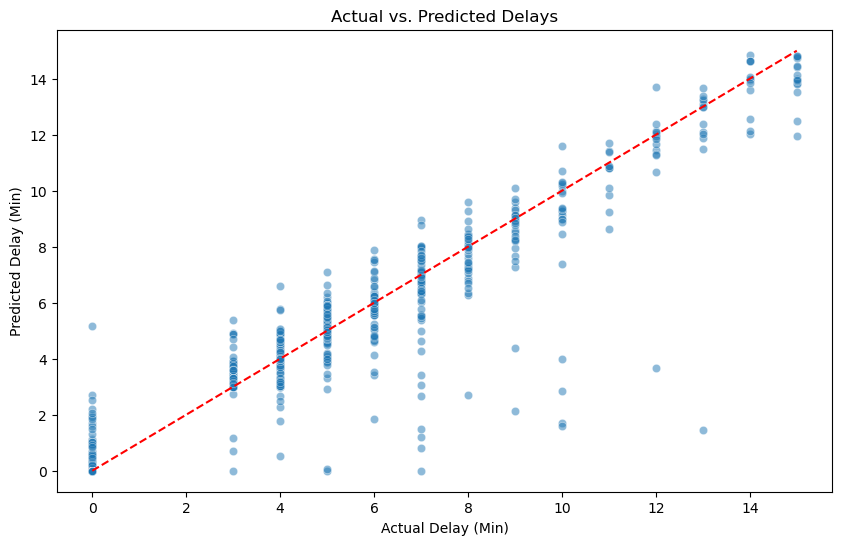

In [33]:
# Create a DataFrame for actual vs. predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results, alpha=0.5)
plt.plot([results['Actual'].min(), results['Actual'].max()], [results['Actual'].min(), results['Actual'].max()], 'r--')
plt.xlabel('Actual Delay (Min)')
plt.ylabel('Predicted Delay (Min)')
plt.title('Actual vs. Predicted Delays')
plt.show()

In [34]:
y_pred

array([ 6.13,  0.21,  5.98, ..., 13.66,  3.17,  0.  ])